## Ejercicio 5-2: Tasa de acierto para entrenamiento vs validación. Análisis

El siguiente programa nos permite comparar y analizar las tasas de acieto para los dataset de entrenamiento y validación\
para distintos valores de k.\
Esto nos permite valorar la calidad del modelo y determinar si hay o no sobreajuste.\
El modelo de clasificación es k-NN.\



In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv('./data/iris.csv', names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])

In [3]:
# Obtenemos el Dataframe x con las features predictoras y el Dataframe y con la columna objetivo
x = df.drop('class', axis=1)
y = df['class']

In [4]:
# Si eliminamos la parte de aleatoriedad, cada vez que ejecutemos la linea se van a generar dataset con eleción de datos distintos
# esto puede generar disparidad de resultados de validación en cada ejecución (podemos hacer una prueba de varias ejecuciones con K=3)

# Definición de semilla aleatoria
RANDOM_SEED = 25

# Partición en datos de entrenamiento y de validación
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_SEED)

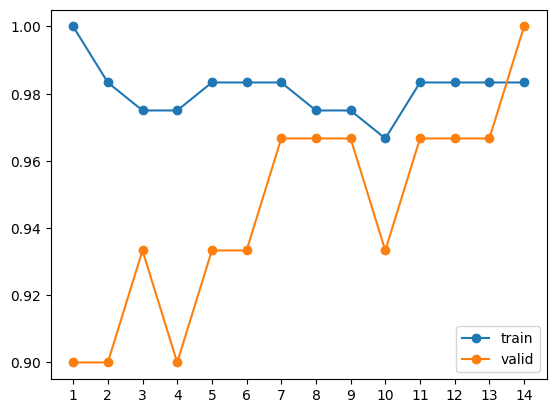

In [5]:
test_acc_rate = []  # Almaceno la tasa de acierto para el test obtenida par cada valor de k
train_acc_rate = [] # Almaceno la tasa de acierto para validación obtenida par cada valor de k

for k in range(1, 15):
  clf = KNeighborsClassifier(n_neighbors = k)
  clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test) # Obtengo la prediccion con los datos de validación
  acc_rate = accuracy_score(y_test, y_pred)
  test_acc_rate.append(acc_rate)
  y_pred = clf.predict(x_train) # Obtengo la prediccion con los datos de entrenamiento
  acc_rate = accuracy_score(y_train, y_pred)
  train_acc_rate.append(acc_rate)
  
plt.xticks(np.arange(1,len(train_acc_rate)+1, step=1))
plt.plot(range(1,len(train_acc_rate)+1), train_acc_rate, marker='o', label = 'train')
plt.plot(range(1,len(test_acc_rate)+1), test_acc_rate, marker='o', label = 'valid')
plt.legend()
plt.show()